In [1]:
#pip install category_encoders

In [2]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.preprocessing import StandardScaler
import warnings 
from sklearn.linear_model import LinearRegression

from sklearn import datasets
from sklearn import svm

In [3]:
df1 = pd.read_csv('df1.csv' , index_col=0)
df1.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only,number_of_days
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5


In [4]:
df2 = pd.read_csv('df2.csv' , index_col=0)
df2.head()

,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,AK,0.0,0.0,0.0,0.0,0.0,2292.8,0.0
1,AL,6780.6,134.7,148.7,13894.8,26457.6,716.4,2377.1
2,AR,6651.0,4597.8,291.0,10216.5,706.4,0.0,1135.5
3,AZ,1486.5,1879.5,0.0,5358.0,0.0,1327.8,0.0
4,CA,16199.3,18798.3,15131.0,3445.4,0.0,98106.3,0.0


In [5]:
df3 = pd.read_csv('df3.csv' , index_col=0)
df3.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,1980,AK,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0
2,1980,AR,1,1,0,0,0,0,0
3,1980,AZ,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0


In [6]:
Inflation_rate_vs_total_cost = pd.read_csv('Inflation_rate_vs_total_cost.csv' , index_col=0)
Inflation_rate_vs_total_cost.head()

,year_only,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars)
0,1980,82383.333333,44434.8
1,1981,90933.333333,3392.1
2,1982,96533.333333,14765.9
3,1983,99583.333333,26005.6
4,1984,103933.333333,3124.5


In [7]:
#df1d = pd.concat([df1, disaster_counts], axis=1)
#df1d.head()

# Inflation Rate vs total cost 

Predicting if the rise in inflation rate has any correlation with the costs of disasters.

In [8]:
X = Inflation_rate_vs_total_cost.iloc[:, 1]
y = Inflation_rate_vs_total_cost.iloc[:, 2]

In [9]:
X = np.array(X).reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20,  random_state = 40)

In [11]:
scaler = StandardScaler().fit(X_train)

In [12]:
scaler.transform(X_train)

array([[-0.20235905],
       [-1.43796192],
       [-1.24275842],
       [-0.3092212 ],
       [ 1.36870575],
       [ 0.10485128],
       [ 1.18295669],
       [ 0.82668678],
       [-1.38416337],
       [ 1.03468434],
       [ 0.30358256],
       [ 0.19142874],
       [-0.45283101],
       [-0.37389706],
       [-0.01788586],
       [-0.95450988],
       [ 0.70591637],
       [ 0.03194395],
       [-0.26541801],
       [-1.68755194],
       [-0.83603547],
       [ 1.03974229],
       [ 2.02065311],
       [ 1.09272357],
       [-0.73887469],
       [ 0.9089383 ],
       [-0.10343438],
       [ 1.63892884],
       [-0.59232507],
       [-1.5367396 ],
       [ 1.28841067],
       [-1.05446348],
       [ 0.65614095],
       [-1.20586379]])

In [13]:
scaler.transform(X_test)

array([[-0.66582037],
       [ 0.64397748],
       [ 0.41456045],
       [ 0.96830486],
       [-0.52617931],
       [ 0.51661602],
       [-1.30743428],
       [ 2.19224992],
       [ 1.42513103]])

In [14]:
# instantiate the model with desired parameter values
lr = LinearRegression()
# fit the model to the training data
lr.fit(X_train, y_train)
# apply the model to test data
y_pred = lr.predict(X_test)                                            
# get coef, intercept values
print (lr.coef_)
print (lr.intercept_)

[0.74982793]
-66952.14106484054


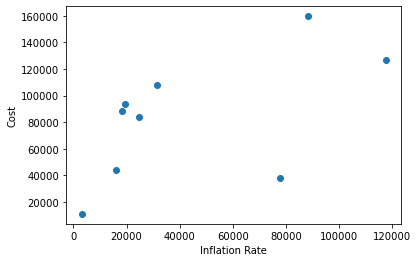

In [15]:
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Inflation Rate')
_ = plt.ylabel('Cost')

# Deaths vs total costs

In [16]:
X = df1.iloc[:, 5]
y = df1.iloc[:, 4]

In [17]:
#X.dropna

In [18]:
#X.fillna(0)

In [19]:
X = np.array(X).reshape(-1,1)

In [20]:
#X.head()

In [21]:
X.shape

(376, 1)

In [22]:
y.shape

(376,)

In [23]:
#X = X.reshape(X.shape[1:])

In [24]:
#X = X.transpose()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20,  random_state = 40)

In [26]:
#prediction = model.predict(X_test)

In [27]:
#X_train.head()

In [28]:
y_train.head()

77     2151.7
365    1938.4
319    1416.0
133    3736.7
175    1679.6
Name: Total CPI-Adjusted Cost (Millions of Dollars), dtype: float64

In [29]:
scaler = StandardScaler().fit(X_train)

In [30]:
scaler.transform(X_train)

array([[-1.11217253e-01],
       [-2.29484140e-01],
       [-2.50354767e-01],
       [-1.87742885e-01],
       [-2.36441015e-01],
       [-2.50354767e-01],
       [-2.43397891e-01],
       [-2.29484140e-01],
       [ 2.36626532e-01],
       [-2.29484140e-01],
       [-2.15570388e-01],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [ 1.87928402e-01],
       [-1.46001631e-01],
       [-1.59915383e-01],
       [ 6.27046396e-02],
       [-2.50354767e-01],
       [-2.22527264e-01],
       [-2.50354767e-01],
       [-1.04260377e-01],
       [-2.50354767e-01],
       [-2.43397891e-01],
       [-1.87742885e-01],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [ 6.95780328e-01],
       [-1.04260377e-01],
       [ 4.18340125e-02],
       [-2.50354767e-01],
       [ 1.40065097e-02],
       [-1.73829134e-01],
       [ 6.27046396e-02],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [-2.5

In [31]:
scaler.transform(X_test)

array([[-8.33897500e-02],
       [-9.03466257e-02],
       [-2.50354767e-01],
       [-2.36441015e-01],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [ 4.24462176e-01],
       [ 1.25316521e-01],
       [-2.29484140e-01],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [-1.80786010e-01],
       [-6.25191229e-02],
       [ 1.46187148e-01],
       [ 9.74890181e-02],
       [ 3.68807170e-01],
       [-1.94699761e-01],
       [-1.39044756e-01],
       [-2.36441015e-01],
       [-2.50354767e-01],
       [ 6.05340944e-01],
       [-2.15570388e-01],
       [-2.50354767e-01],
       [ 2.90806680e+00],
       [ 1.98280233e+00],
       [-2.36441015e-01],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [-1.66872258e-01],
       [-2.50354767e-01],
       [-2.50354767e-01],
       [-1.39044756e-01],
       [ 4.87074057e-01],
       [-7.64328743e-02],
       [-2.36441015e-01],
       [-1.52958507e-01],
       [-2.08613513e-01],
       [-2.50354767e-01],
       [-6.8

In [32]:
# instantiate the model with desired parameter values
lr = LinearRegression()
# fit the model to the training data
lr.fit(X_train, y_train)
# apply the model to test data
y_pred = lr.predict(X_test)                                            
# get coef, intercept values
print (lr.coef_)
print (lr.intercept_)

[71.56328839]
4138.26712831367


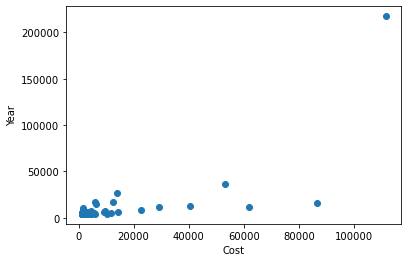

In [33]:
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Cost')
_ = plt.ylabel('Year')

# Total Cost vs Days

In [34]:
X = df1.iloc[:, 7]
y = df1.iloc[:, 4]

In [35]:
X = np.array(X).reshape(-1,1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20,  random_state = 40)

In [37]:
scaler = StandardScaler().fit(X_train)

In [38]:
scaler.transform(X_train)

array([[-0.38277954],
       [-0.3695681 ],
       [-0.39599099],
       [-0.3695681 ],
       [-0.40920243],
       [-0.42241387],
       [-0.38277954],
       [ 1.98206876],
       [-0.38277954],
       [-0.39599099],
       [-0.3695681 ],
       [-0.38277954],
       [-0.40920243],
       [-0.3695681 ],
       [-0.39599099],
       [-0.35635666],
       [-0.39599099],
       [-0.40920243],
       [-0.38277954],
       [-0.39599099],
       [ 0.766616  ],
       [-0.38277954],
       [-0.39599099],
       [-0.35635666],
       [-0.34314521],
       [-0.40920243],
       [-0.42241387],
       [ 2.37841205],
       [-0.40920243],
       [ 4.38655139],
       [-0.38277954],
       [-0.40920243],
       [-0.38277954],
       [-0.39599099],
       [-0.39599099],
       [ 2.37841205],
       [-0.42241387],
       [-0.35635666],
       [-0.39599099],
       [ 1.9952802 ],
       [-0.39599099],
       [-0.3695681 ],
       [-0.38277954],
       [ 0.77982744],
       [-0.38277954],
       [-0

In [39]:
scaler.transform(X_test)

array([[ 0.766616  ],
       [-0.39599099],
       [-0.34314521],
       [-0.35635666],
       [-0.40920243],
       [-0.40920243],
       [-0.34314521],
       [ 2.39162349],
       [-0.39599099],
       [-0.40920243],
       [-0.39599099],
       [-0.34314521],
       [-0.3695681 ],
       [-0.40920243],
       [ 1.00442197],
       [-0.42241387],
       [ 2.39162349],
       [-0.38277954],
       [-0.39599099],
       [-0.40920243],
       [ 4.39976283],
       [-0.39599099],
       [-0.39599099],
       [ 0.77982744],
       [-0.38277954],
       [-0.35635666],
       [-0.40920243],
       [-0.40920243],
       [ 1.98206876],
       [-0.38277954],
       [-0.39599099],
       [ 0.77982744],
       [ 2.39162349],
       [-0.38277954],
       [-0.42241387],
       [-0.3695681 ],
       [-0.34314521],
       [ 4.39976283],
       [-0.40920243],
       [-0.40920243],
       [-0.35635666],
       [-0.29029944],
       [-0.40920243],
       [-0.39599099],
       [-0.38277954],
       [-0

In [40]:
# instantiate the model with desired parameter values
lr = LinearRegression()
# fit the model to the training data
lr.fit(X_train, y_train)
# apply the model to test data
y_pred = lr.predict(X_test)                                            
# get coef, intercept values
print (lr.coef_)
print (lr.intercept_)

[6.45424638]
6507.227562297339


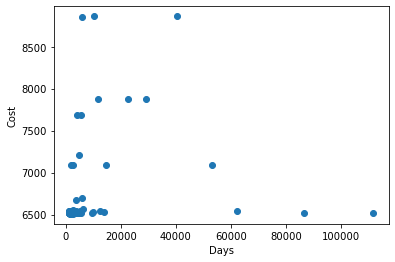

In [41]:
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Days')
_ = plt.ylabel('Cost')

# Value Counts and Dummies for Disaster

In [42]:
disaster = df1['Disaster']
disaster_counts = disaster.value_counts()

In [43]:
disaster_counts.head()

Severe Storm        186
Tropical Cyclone     62
Flooding             44
Drought              31
Wildfire             22
Name: Disaster, dtype: int64

In [44]:
print(disaster_counts)

Severe Storm        186
Tropical Cyclone     62
Flooding             44
Drought              31
Wildfire             22
Winter Storm         22
Freeze                9
Name: Disaster, dtype: int64


In [45]:
disaster_dummies = pd.get_dummies(df1.Disaster)

In [46]:
disaster_dummies.head()

,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


# State Disaster Dummies

In [47]:
disaster_cost_per_state= pd.merge(df2, df3, left_on = 'state', right_on='state')
disaster_cost_per_state.index = disaster_cost_per_state.index + 1

In [48]:
disaster_cost_per_state.tail()

,state,drought_x,flooding_x,freeze_x,severe storm_x,tropical cyclone_x,wildfire_x,winter storm_x,year,drought_y,flooding_y,freeze_y,severe storm_y,tropical cyclone_y,wildfire_y,winter storm_y
2426,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2020,1,0,0,0,0,1,0
2427,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2021,1,0,0,0,0,1,0
2428,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2022,1,0,0,0,0,0,0
2429,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2023,0,0,0,2,0,0,0
2430,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2024,0,0,0,0,0,0,0


In [49]:
disaster_cost_per_state.rename(columns={'flooding_y': 'Total number of Floods', 'flooding_x': 'State Flooding Cost(Millions)' , 'drought_y': 'Total number of Droughts', 'drought_x': 'State Droughts Cost(Millions)' , 'freeze_y': 'Total number of Freeze', 'freeze_x': 'State Freeze Cost(Millions)' , 'severe storm_y': 'Total number of Severe Stormes', 'severe storm_x': 'State Severe Storm Cost(Millions)' , 'tropical cyclone_y': 'Total number of Tropical cyclones', 'tropical cyclone_x': 'State Tropical cyclone Cost(Millions)' , 'wildfire_y': 'Total number of wildfires', 'wildfire_x': 'State wildfire Cost (Millions)' , 'winter storm_y': 'Total number of Winter Stormes', 'winter storm_x': 'State Winter Storm Cost(Millions)'}, inplace= True)

In [50]:
disaster_cost_per_state.tail()

,state,State Droughts Cost(Millions),State Flooding Cost(Millions),State Freeze Cost(Millions),State Severe Storm Cost(Millions),State Tropical cyclone Cost(Millions),State wildfire Cost (Millions),State Winter Storm Cost(Millions),year,Total number of Droughts,Total number of Floods,Total number of Freeze,Total number of Severe Stormes,Total number of Tropical cyclones,Total number of wildfires,Total number of Winter Stormes
2426,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2020,1,0,0,0,0,1,0
2427,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2021,1,0,0,0,0,1,0
2428,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2022,1,0,0,0,0,0,0
2429,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2023,0,0,0,2,0,0,0
2430,WY,2760.6,0.0,8.2,1420.9,0.0,1083.6,0.0,2024,0,0,0,0,0,0,0


In [51]:
state_dummies = pd.get_dummies(disaster_cost_per_state.state)

In [52]:
state_dummies.tail()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
2426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Standard Scaler Deaths

In [53]:
# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(df1[['Deaths']])

# Transform the data using the fitted scaler
df1['Deaths_SS'] = SS_scaler.transform(df1[['Deaths']])

# Compare the origional and transformed column
print(df1[['Deaths_SS', 'Deaths']].head())

   Deaths_SS  Deaths
0  -0.181162       7
1  -0.151369      13
2   6.040611    1260
3  -0.215920       0
4  -0.116610      20


# Standard Scaler Inflation Rate

In [54]:
# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(Inflation_rate_vs_total_cost[['Inflation rate value']])

# Transform the data using the fitted scaler
Inflation_rate_vs_total_cost['Inflation rate value_SS'] = SS_scaler.transform(Inflation_rate_vs_total_cost[['Inflation rate value']])

# Compare the origional and transformed column
print(Inflation_rate_vs_total_cost[['Inflation rate value_SS', 'Inflation rate value']].head())

   Inflation rate value_SS  Inflation rate value
0                -1.737774          82383.333333
1                -1.589933          90933.333333
2                -1.493102          96533.333333
3                -1.440363          99583.333333
4                -1.365146         103933.333333


In [55]:
#X = [[disaster_counts]]
#y = df1.iloc[:, 4]

In [56]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.80,  random_state = 40)

In [57]:
#df_train= X_train
#df_test= X_test

In [58]:
#X = np.array(X).reshape(-1,1)

In [59]:
#import category_encoders as ce

#encoder = ce.OneHotEncoder(cols=[disaster_counts], use_cat_names=True,
    #                    return_df=True)

#df_train_transformed = encoder.fit_transform(df_train)
#df_test_transformed = encoder.transform(df_test)